# Recommendation System : Demographic Filtering

Demographic Filtering adalah teknik rekomendasi yang sifatnya general (tidak personalized). 

In [310]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy.stats import normaltest

# Load Dataset

Dataset diambil dari [Sumber](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination)

In [311]:
# Rating tempat wisata
df_rating = pd.read_csv('tourism_rating.csv')
df_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [312]:
# Destinasi Wisata
df_destinasi = pd.read_csv('tourism_with_id.csv')
df_destinasi.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [313]:
# Menggabungkan DataFrame
df = pd.merge(df_rating, df_destinasi, how='inner', on= 'Place_Id').sort_values('Place_Id').reset_index(drop='True')
df.head(3)

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,36,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,265,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
2,254,1,5,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1


# Data Understanding

In [314]:
display(df.shape, df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        10000 non-null  int64  
 1   Place_Id       10000 non-null  int64  
 2   Place_Ratings  10000 non-null  int64  
 3   Place_Name     10000 non-null  object 
 4   Description    10000 non-null  object 
 5   Category       10000 non-null  object 
 6   City           10000 non-null  object 
 7   Price          10000 non-null  int64  
 8   Rating         10000 non-null  float64
 9   Time_Minutes   4628 non-null   float64
 10  Coordinate     10000 non-null  object 
 11  Lat            10000 non-null  float64
 12  Long           10000 non-null  float64
 13  Unnamed: 11    0 non-null      float64
 14  Unnamed: 12    10000 non-null  int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 1.1+ MB


(10000, 15)

None

In [315]:
df.duplicated().sum()

79

In [316]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(9921, 15)

## Feature Properties
- Hanya memilih feature yang akan digunakan.

In [317]:
df = df.copy().drop(columns=['Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12'])
df.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price
0,36,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000
1,265,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000
2,254,1,5,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000
3,235,1,4,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000
4,227,1,5,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000


## Descriptive Statistics

In [318]:
display(df.describe(),
df.describe(include='object'))

,User_Id,Place_Id,Place_Ratings,Price
count,9921.000000,9921.000000,9921.000000,9921.000000
mean,151.337970,219.486745,3.066929,23774.317105
std,86.107089,126.164097,1.380070,62834.992319
min,1.000000,1.000000,1.000000,0.000000
25%,77.000000,109.000000,2.000000,0.000000
50%,151.000000,220.000000,3.000000,5000.000000
75%,226.000000,329.000000,4.000000,20000.000000
max,300.000000,437.000000,5.000000,900000.000000


,Place_Name,Description,Category,City
count,9921,9921,9921,9921
unique,437,437,6,5
top,Gunung Lalakon,Gunung Lalakon merupakan sebuah gunung yang te...,Taman Hiburan,Yogyakarta
freq,39,39,3024,2848


## Unique Values

In [319]:
# Menampilkan Total Nilai Unik dan Nilai unik dari tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()   ])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'], data=listItem)
unique_values

,Column Name,Number of Unique,Unique Sample
0,User_Id,300,"[36, 265, 254, 235, 227, 189, 187, 167, 169, 1..."
1,Place_Id,437,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,Place_Ratings,5,"[4, 5, 1, 2, 3]"
3,Place_Name,437,"[Monumen Nasional, Kota Tua, Dunia Fantasi, Ta..."
4,Description,437,[Monumen Nasional atau yang populer disingkat ...
5,Category,6,"[Budaya, Taman Hiburan, Cagar Alam, Bahari, Pu..."
6,City,5,"[Jakarta, Yogyakarta, Bandung, Semarang, Surab..."
7,Price,50,"[20000, 0, 270000, 10000, 94000, 25000, 4000, ..."


# Simple EDA

In [320]:
# Menyimpan nama kolom dari kolom numerikal
numerical_features = df.drop(columns=['User_Id', 'Place_Id']).describe().columns

# Menyimpan nama kolom dari kolom kategorikal
categorical_features = df.drop(columns=['Place_Name','Description']).describe(include='object').columns

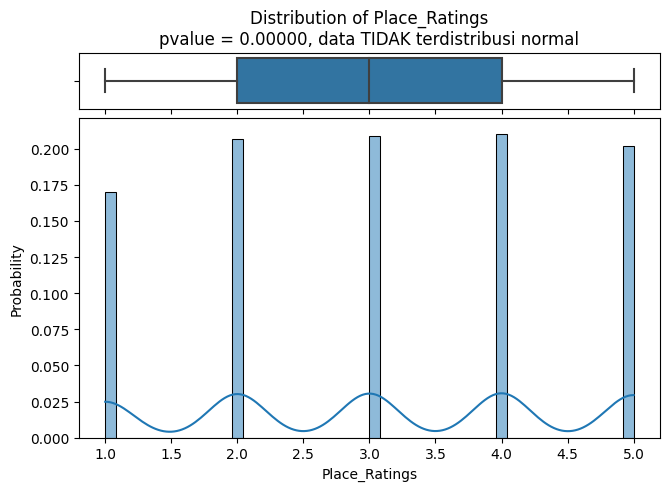

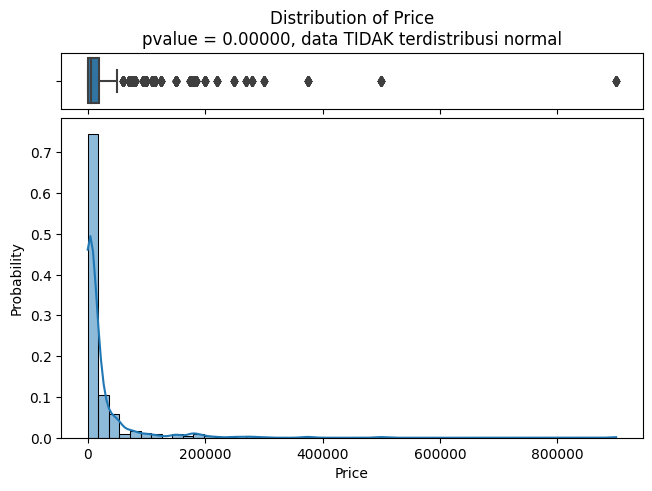

In [321]:
for kolom in numerical_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, stat = "probability", kde=True, bins=50)

    plt.show()

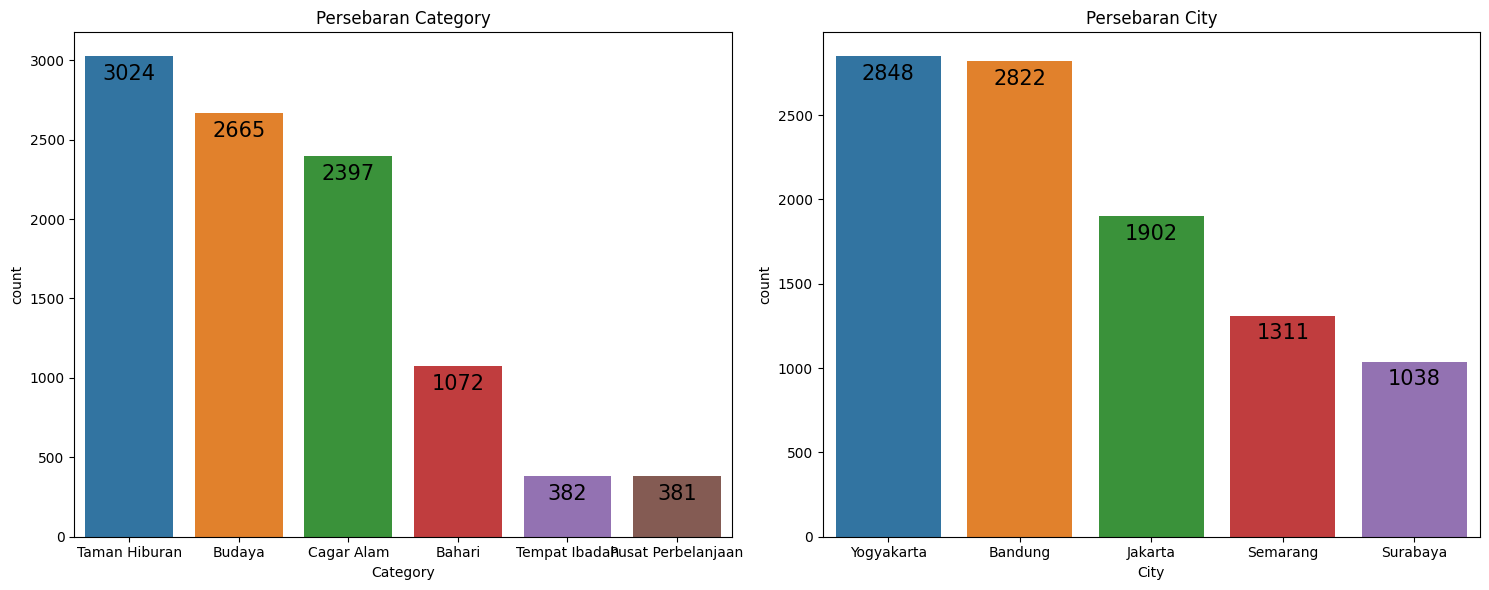

In [322]:
# Menampilkan kolom kategorikal dalam bentuk barplot
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 
for i, j in zip(categorical_features, axes.flatten()):
    ax = sns.countplot(data=df, x= i, ax= j, order=df[i].value_counts().index)
    ax.set_title(f'Persebaran {i}',size = 12)
    ax.bar_label(ax.containers[0], padding= -20, size=15)
    plt.tight_layout()

plt.show()

# Data Preprocessing

Membuat fitur-fitur baru untuk menghitung nilai WR :

![](https://1.bp.blogspot.com/-IwW-xX59Hi4/YF7TyvzmM7I/AAAAAAAAdkg/34Mpp3aW5LAsy561icqkdDEsq_O2ZgI9gCLcBGAsYHQ/s762/weight-avg.png)

- v : jumlah banyaknya user yang memberikan rating pada destinasi tersebut -> (Vote)
- m : syarat minimum vote -> menggunakan quantile 1
- R : rata-rata rating perdestinasi itu -> (Rating)
- C : rata-rata rating semua destinasi -> (rating keseluruhan destinasi)

## V (Jumlah banyaknya user yang memberikan rating)

In [323]:
df['Vote'] = df.groupby('Place_Id')['Place_Id'].transform('count')
df.sample(5)

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Vote
6905,101,306,2,Sungai Palayangan,Sungai Palayangan terletak di Kawasan Objek Wi...,Cagar Alam,Bandung,150000,21
4602,9,204,2,Desa Wisata Pulesari,Desa Wisata Pulesari semakin menambah deretan ...,Taman Hiburan,Yogyakarta,0,22
986,146,44,5,Monumen Selamat Datang,Monumen Selamat Datang adalah sebuah monumen y...,Budaya,Jakarta,0,19
9175,146,405,2,Surabaya North Quay,Surabaya menjadi kota besar yang sering menjad...,Taman Hiburan,Surabaya,50000,27
2264,280,99,3,Kampung Wisata Kadipaten,Kampung Wisata Kadipaten secaara kewilayahan b...,Budaya,Yogyakarta,0,24


## R (Rata-Rata Rating perdestinasi)

In [324]:
df['Rating'] = df.groupby('Place_Id')['Place_Ratings'].transform('mean')
df.sample(5)

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Vote,Rating
7131,27,316,4,Curug Malela,Curug Malela adalah salah satu destinasi alam ...,Cagar Alam,Bandung,10000,21,3.000000
8772,221,386,1,Air Terjun Semirang,Terletak di lereng Gunung Ungaran bagian utara...,Cagar Alam,Semarang,9000,23,2.826087
2993,17,134,4,Desa Wisata Gamplong,Desa Wisata Gamplong adalah desa wisata keraji...,Taman Hiburan,Yogyakarta,10000,30,3.633333
6295,20,278,3,Masjid Daarut Tauhiid Bandung,pada bulan Juli 1993 berdirilah sebuah masjid ...,Tempat Ibadah,Bandung,0,19,3.052632
6804,258,300,4,Sanghyang Heuleut,Danau yang satu ini memiliki air jernih bernua...,Cagar Alam,Bandung,10000,29,3.655172


## DataFrame Final

In [325]:
df = df.copy().drop(columns=['User_Id', 'Place_Id', 'Place_Ratings']).reset_index(drop='True')
df.sample(5)

,Place_Name,Description,Category,City,Price,Vote,Rating
7582,Candi Gedong Songo,Candi Gedong Songo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦒꦼꦝꦺꦴꦁ​...,Budaya,Semarang,10000,23,3.304348
1434,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Budaya,Jakarta,2000,23,2.565217
3816,Candi Borobudur,"Borobudur (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦧꦫꦧꦸꦝꦸꦂ, transli...",Budaya,Yogyakarta,50000,19,3.105263
2290,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,24,2.750000
5702,Kampoeng Tulip,Kampoeng Tulip ialah salah satu objek wisata d...,Taman Hiburan,Bandung,15000,30,3.166667


In [326]:
df = df.drop_duplicates().reset_index(drop='True')
df.sample(5)

,Place_Name,Description,Category,City,Price,Vote,Rating
286,Puspa Iptek Sundial,Puspa Iptek Sundial adalah wahana pendidikan y...,Taman Hiburan,Bandung,25000,14,3.500000
81,Museum Satria Mandala,Museum Satria Mandala adalah museum sejarah pe...,Budaya,Jakarta,5000,23,3.000000
373,Hutan Pinus Kayon,Tak dipungkiri Hutan Pinus Kayon Getasan dekat...,Cagar Alam,Semarang,6000,28,3.142857
5,Taman Impian Jaya Ancol,Taman Impian Jaya Ancol merupakan sebuah objek...,Taman Hiburan,Jakarta,25000,24,2.958333
233,Amazing Art World,"Amazing Art World Bandung, sebuah objek wisata...",Budaya,Bandung,75000,23,2.217391


# Modeling

## Mengaplikasikan Score Weighted Rating pada DataFrame

In [327]:
C = df['Rating'].mean()
C

3.068351481218268

In [328]:
m = df['Vote'].quantile(0.25)
m

19.0

In [329]:
df['Score'] = df.apply(lambda x: (x['Rating'] * x['Vote'] + C*m) / (x['Vote'] + m), axis=1)
df.head()

,Place_Name,Description,Category,City,Price,Vote,Rating,Score
0,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,18,3.722222,3.386451
1,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,25,2.840000,2.938606
2,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,19,2.526316,2.797334
3,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,21,2.857143,2.957467
4,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,25,3.520000,3.324970


In [330]:
# save file
df.to_csv('df_destinasi_wisata.csv', index=False)

## Melakukan Rekomendasi

In [331]:
# fungsi untuk melakukan rekomendasi
def recommendation(df, kota=None, kategori=None, maxharga=None) :
    df = df.copy()
    if kota is not None:
        df = df[df['City'] == kota]
    if kategori is not None:
        df = df[df['Category'] == kategori]
    if maxharga is not None:
        df = df[df['Price']<= maxharga]

    recom = df[['City', 'Category', 'Price', 'Place_Name', 
                'Description','Score']].sort_values('Score', ascending=False).reset_index(drop=True).head(10)
    return recom

In [332]:
# Melakukan Rekomendasi untuk kota Bandung dan katergori Taman Hiburan
recommendation(df, kota='Bandung', kategori='Taman Hiburan')

,City,Category,Price,Place_Name,Description,Score
0,Bandung,Taman Hiburan,0,Teras Cikapundung BBWS,Teras Cikapundung Bandung sebelumnya merupakan...,3.428913
1,Bandung,Taman Hiburan,30000,Glamping Lakeside Rancabali,Glamping Lakeside Rancabali menawarkan tempat ...,3.417915
2,Bandung,Taman Hiburan,40000,Dago Dreampark,Dago Dreampark merupakan wisata kekinian di Ko...,3.357467
3,Bandung,Taman Hiburan,30000,Stone Garden Citatah,"Stone Garden, adalah sebutan nama untuk hampa...",3.322819
4,Bandung,Taman Hiburan,20000,Kota Mini,Destinasi yang sangat menarik bernuansa eropa ...,3.309272
5,Bandung,Taman Hiburan,25000,Selasar Sunaryo Art Space,Selasar Sunaryo Art Space (SSAS) adalah sebuah...,3.299968
6,Bandung,Taman Hiburan,0,Taman Lansia,Berlibur santai di akhir pekan cocok dilakukan...,3.278343
7,Bandung,Taman Hiburan,100000,Upside Down World Bandung,Upside Down World Bandung pertama kali dibuka ...,3.264069
8,Bandung,Taman Hiburan,25000,Puspa Iptek Sundial,Puspa Iptek Sundial adalah wahana pendidikan y...,3.251475
9,Bandung,Taman Hiburan,280000,Trans Studio Bandung,Trans Studio Bandung adalah kawasan wisata ter...,3.251316


Interpretasi :
- Teras Cikapundung adalah rekomendasi terbaik untuk destinasi wisata pada kota Bandung dengan Kategori Taman Hiburan

In [333]:
# Melakukan Rekomendasi untuk kota Jakarta dan katergori Bahari dengan Harga dibawah 250000
recommendation(df, kota='Jakarta', kategori='Bahari', maxharga=250000)

,City,Category,Price,Place_Name,Description,Score
0,Jakarta,Bahari,25000,Pantai Ancol,Pantai Ancol merupakan kawasan wisata yang mer...,3.046912
1,Jakarta,Bahari,150000,Pulau Pari,Pulau Pari adalah sebuah pulau yang terletak d...,2.949961
2,Jakarta,Bahari,150000,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,2.918142
3,Jakarta,Bahari,40000,Pulau Semak Daun,Pulau Semak Daun merupakan salah satu pulau ya...,2.911873
4,Jakarta,Bahari,5000,Pulau Pramuka,Pulau Pramuka merupakan salah satu pulau yang ...,2.847697
5,Jakarta,Bahari,175000,Pelabuhan Marina,Pelabuhan Marina Ancol berada di kawasan Taman...,2.823649
6,Jakarta,Bahari,5000,Pulau Bidadari,Pulau Bidadari merupakan salah satu resor di K...,2.797644


Interpretasi :
- Pantai Ancol adalah destinasi wisata terbaik untuk kota Jakarta dengan kategori Bahari dan dengan rentang harga antara 150000 - 250000

# Kesimpulan

Pemodelan Demographic Recommendation sangat membantu untuk memilih pilihan destinasi wisata yang apabila user tidak mengetahui secara pasti ingin berkunjung kemana. Karena pada Demographic Recommendation user dapat memilih pilihan destinasi wisata sesuai kriteria atau prefrensi yang diinginkan.